<h1 style="color:pink;">Installing Required Libraries</h1>

The following Python libraries are required for this project:

1. **pandas**: For data manipulation and analysis.
2. **matplotlib**: For creating static, interactive, and animated visualizations.
3. **seaborn**: For statistical data visualization, built on top of matplotlib.
4. **scikit-learn**: For machine learning and data science tasks.

Run the code cell below to install these libraries if they are not already installed.


In [35]:
# Install necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

### Import Required Libraries

The following Python libraries are imported for:
- Numerical computations (NumPy)
- Data manipulation (Pandas)
- Data visualization (Seaborn and Matplotlib)


In [36]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, 
    roc_curve, confusion_matrix, ConfusionMatrixDisplay)


<h1 style="color:pink;">1. Data loading</h1>
# Loading and Displaying the Dataset

We are using the `pandas` library to load a CSV file into a DataFrame and display its first five rows.

### Steps:
1. Import the `pandas` library.
2. Use the `pd.read_csv()` function to load the file `data.csv`.
3. Call the `.head()` method to view the first five rows of the dataset.


In [37]:
# Load the CSV file into a DataFrame
df = pd.read_csv('breast-cancer-wisconsin-data.csv')

# Display the first 5 rows of the DataFrame
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<h1 style="color:pink;">2.Data Exploration Analysis</h1>

**View basic information**

The following code displays the information about the dataset, including the number of non-null entries, the data types of each column, and the memory usage. This helps to quickly understand the structure of the data and identify any missing values or data type issues.

In [22]:
# Display data information
print("Data Information:")
print(df.info())


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimete

### Display Basic Statistics of the Dataset

The following code provides a summary of the dataset's basic statistics. It includes measures such as:

- Count of non-null values
- Mean, standard deviation (std)
- Minimum and maximum values
- Percentile values (25%, 50%, 75%)

This helps to understand the distribution and central tendency of the dataset's numerical columns.


In [23]:
# Display basic statistics
print("\nBasic Statistics:")
print(df.describe())



Basic Statistics:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064    

### Display Class Distribution

The following code displays the distribution of classes in the target column (`diagnosis`). It provides the count of each unique value in the column, helping to identify imbalances in the dataset.

This is particularly useful for classification problems, as it shows the number of instances for each class label.


In [24]:
# Display class distribution
print("\nClass Distribution:")
print(df['diagnosis'].value_counts())



Class Distribution:
diagnosis
B    357
M    212
Name: count, dtype: int64


<h1 style="color:pink;">3.Data Preprocessing</h1>

Encode 'diagnosis' as binary
### Mapping Target Column Values

The following code maps the values in the `diagnosis` column to numerical values:

- **M** (Malignant) is mapped to `1`
- **B** (Benign) is mapped to `0`

This transformation is essential for machine learning models, which require numerical inputs for processing. After mapping, the updated column is displayed.


In [25]:
# Map 'diagnosis' values to numerical format
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Display the transformed 'diagnosis' column
df["diagnosis"]


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

### Handling Missing Values in the Dataset

The following code helps identify and handle missing values:

1. **Identify Missing Values**:
   - The code prints the count of missing values for each column using `df.isnull().sum()`.

2. **Drop Missing Values**:
   - Rows containing missing values are removed from the dataset using `df.dropna()`.

This ensures that the dataset is clean and ready for further analysis or machine learning tasks.


In [26]:
# Identify and print missing values for each column
print("Missing Values Per Column:")
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()


Missing Values Per Column:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dime

### Checking Unique Values in the 'diagnosis' Column

The following code prints the unique values in the `diagnosis` column after encoding:

- This step ensures that the encoding process was successful.
- The output will confirm the presence of the intended numerical values (`1` for Malignant and `0` for Benign).

This verification step is crucial to validate data preparation before proceeding with further analysis or modeling.


In [39]:
# Print unique values in 'diagnosis' after encoding
print("\nUnique values in 'diagnosis' after encoding:")
print(df['diagnosis'].unique())


Unique values in 'diagnosis' after encoding:
['M' 'B']


### Feature Scaling and Label Separation

This section of the code performs the following steps:

1. **Separate Features and Labels**:
   - `X`: Contains all features except the `id` and `diagnosis` columns.
   - `y`: Contains the target variable (`diagnosis`).

2. **Standardize Features**:
   - The `StandardScaler` from `sklearn` is applied to scale the features in `X` to have a mean of 0 and a standard deviation of 1. This ensures all features are on a similar scale, which is crucial for many machine learning algorithms.

3. **Create a Scaled DataFrame**:
   - A new DataFrame, `X_scaled_df`, is created to hold the scaled feature values with their original column names.

4. **Display a Sample**:
   - The first few rows of the scaled feature DataFrame are displayed using `head()`.


In [40]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a DataFrame with scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display a sample of the scaled features
print("\nScaled Feature Sample:")
print(X_scaled_df.head())



Scaled Feature Sample:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst  area

C:\Users\anndi\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\anndi\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\anndi\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


<h1 style="color:pink;">4.Data Visualization </h1>

### Visualizing Feature Distributions with Histograms

The following code generates histograms for all numerical features in the dataset:

1. **Histogram Plot**:
   - Each numerical feature in the DataFrame is plotted as a histogram.
   - The number of bins for each histogram is set to 15 for detailed visualization.

2. **Customization**:
   - The color of the bars is set to `skyblue` for clarity.
   - The edges of the bars are outlined in `black` for contrast.
   - A title, "Histograms of Feature Distributions," is added for better understanding.

3. **Display**:
   - The histograms provide an overview of the data distributions for each feature.

This step is useful for understanding the spread, skewness, and potential outliers in the dataset.


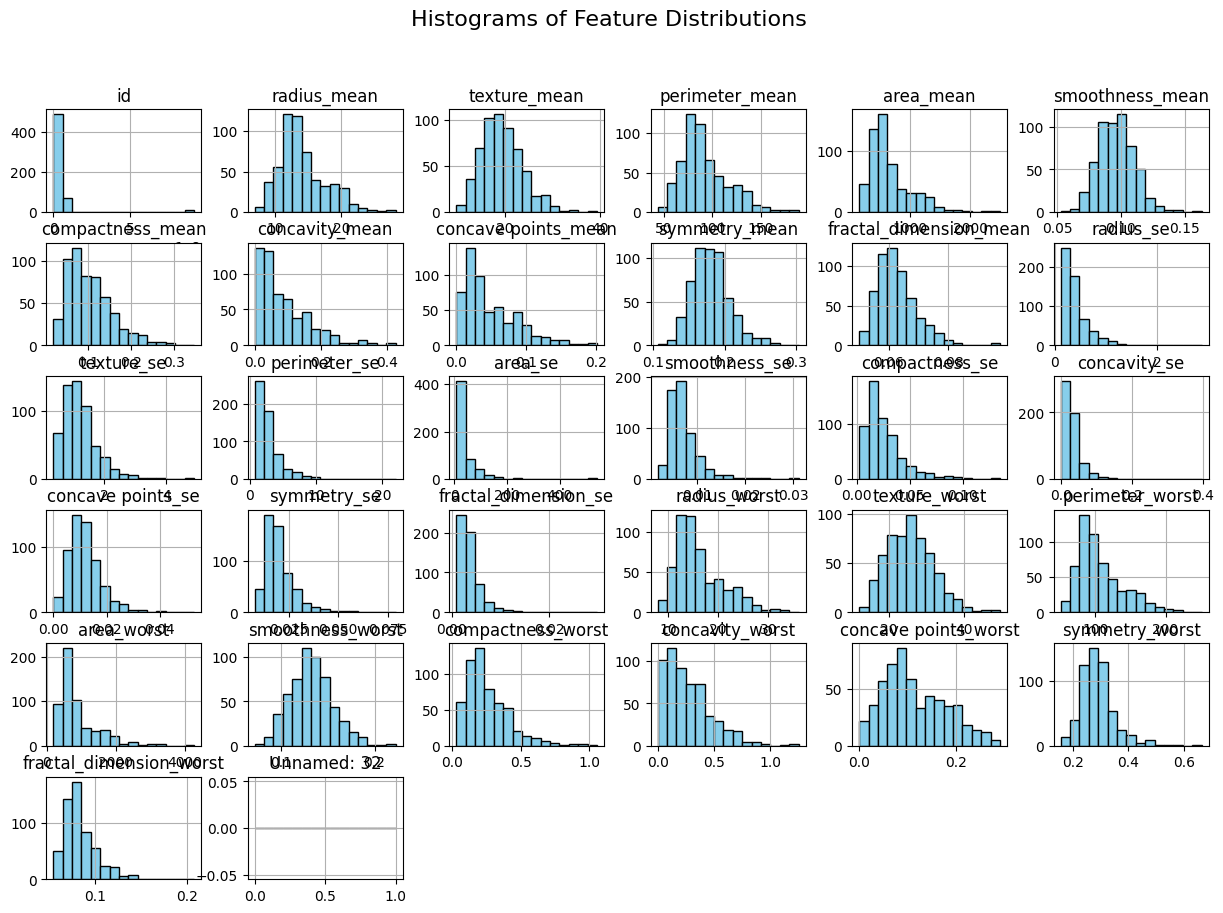

In [41]:
# Plot histograms for all numerical features
df.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Feature Distributions", fontsize=16)
plt.show()

### Visualizing Feature Distributions with Boxplots

The following code creates boxplots for all numerical features in the dataset:

1. **Boxplot Creation**:
   - A boxplot is created for each numerical feature in the DataFrame, excluding the `id` and `diagnosis` columns.
   - Boxplots provide insight into the spread, median, and presence of potential outliers for each feature.

2. **Customization**:
   - The figure size is set to `(12, 8)` for better readability.
   - The x-axis labels are rotated by 90 degrees for better alignment.

3. **Title**:
   - A title, "Boxplots of Features," is added to describe the plot.

4. **Display**:
   - The boxplots are displayed to facilitate feature comparison and analysis of potential anomalies in the data.


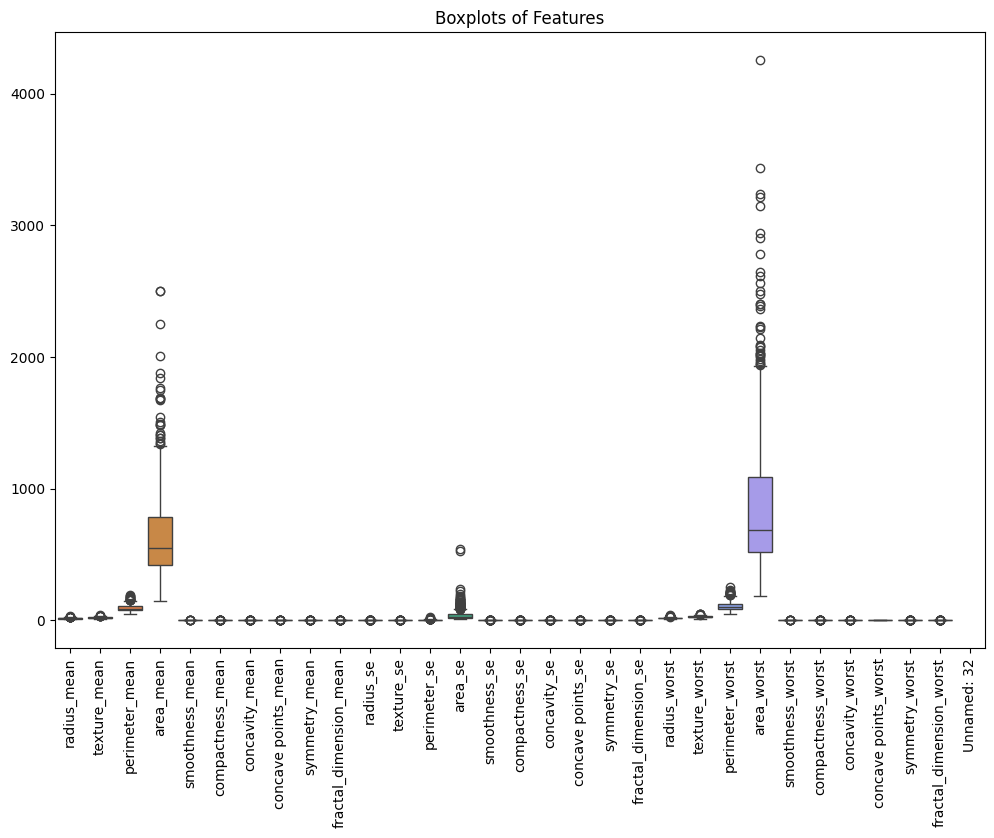

In [ ]:
# Plot boxplots for all numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop(columns=['id', 'diagnosis']))
plt.title("Boxplots of Features")
plt.xticks(rotation=90)
plt.show()


### Visualizing Feature Correlations with a Heatmap

The following code generates a heatmap to visualize the correlations between features in the dataset:

1. **Correlation Matrix**:
   - The `corr()` method is used to calculate the Pearson correlation coefficients for all numerical features in the DataFrame.

2. **Heatmap Plot**:
   - The heatmap is plotted using `seaborn` with the following customizations:
     - The `coolwarm` colormap is used for a visually appealing gradient from negative to positive correlations.
     - `vmin=-1` and `vmax=1` set the range of the correlation values.
     - The `annot=False` parameter avoids cluttering the heatmap with text annotations.

3. **Figure Size**:
   - The figure size is set to `(15, 10)` for better readability.

4. **Title**:
   - A title, "Feature Correlation Matrix," is added to describe the plot.

5. **Display**:
   - The heatmap highlights relationships between features, helping to identify strong positive or negative correlations that might influence model performance.


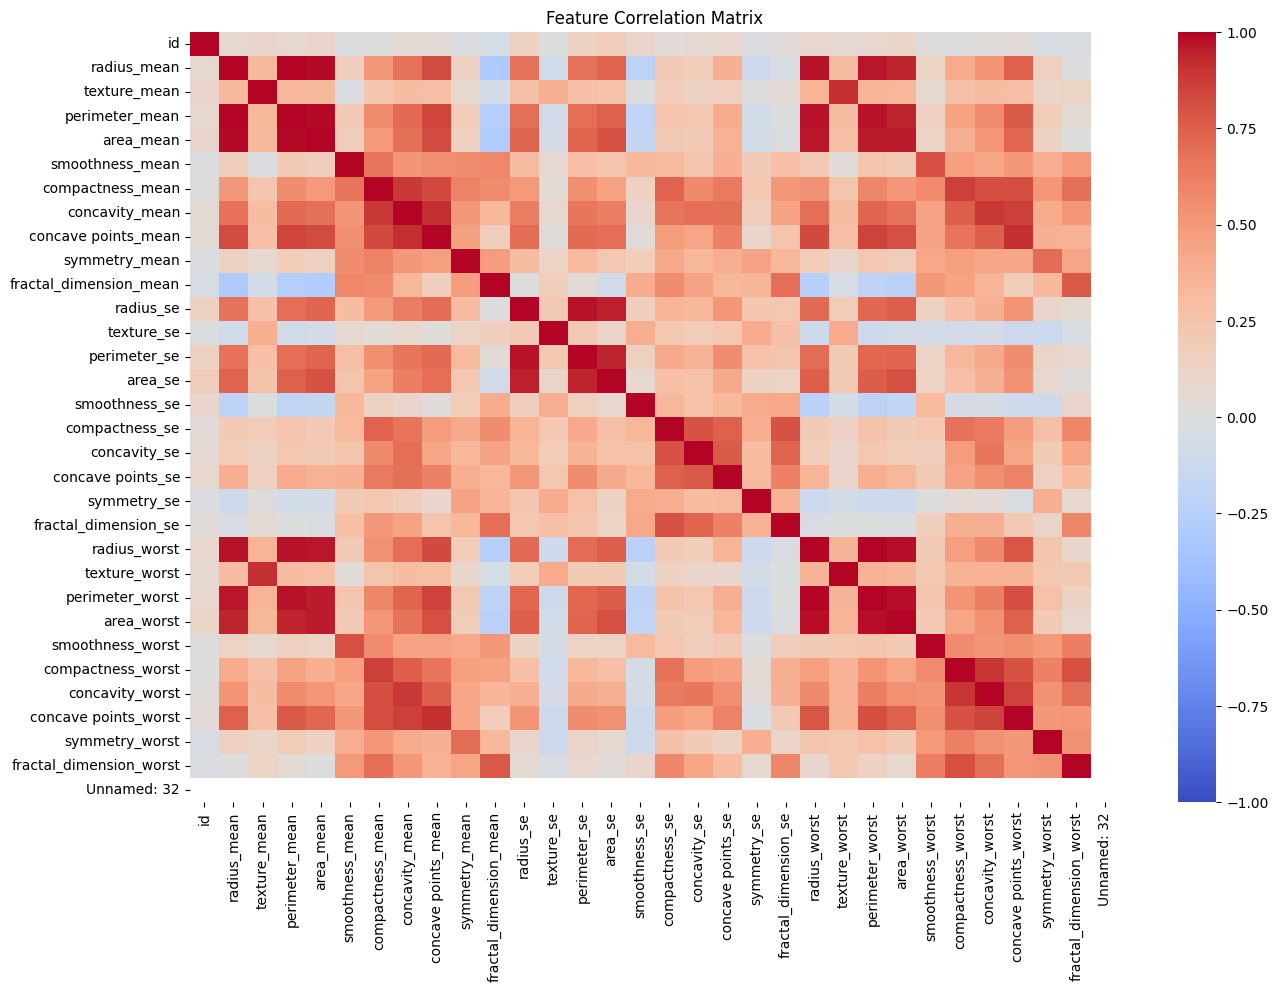

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# If there are non-numeric columns, select only numeric ones
df_numeric = df.select_dtypes(include=['number'])

# Plot feature correlation matrix
plt.figure(figsize=(15, 10))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Feature Correlation Matrix")
plt.show()


### Identify and Print Highly Correlated Feature Pairs

The following code identifies pairs of features that have a correlation greater than 0.8, indicating a strong relationship between them. The pairs are then printed out.

In [ ]:
# Identify highly correlated feature pairs
high_corr_pairs = [(correlation_matrix.index[i], correlation_matrix.columns[j])
                   for i in range(len(correlation_matrix.index))
                   for j in range(i+1, len(correlation_matrix.columns))
                   if abs(correlation_matrix.iloc[i, j]) > 0.8]

print("\nHighly Correlated Feature Pairs:")
print(high_corr_pairs)


Highly Correlated Feature Pairs:
[('radius_mean', 'perimeter_mean'), ('radius_mean', 'area_mean'), ('radius_mean', 'concave points_mean'), ('radius_mean', 'radius_worst'), ('radius_mean', 'perimeter_worst'), ('radius_mean', 'area_worst'), ('texture_mean', 'texture_worst'), ('perimeter_mean', 'area_mean'), ('perimeter_mean', 'concave points_mean'), ('perimeter_mean', 'radius_worst'), ('perimeter_mean', 'perimeter_worst'), ('perimeter_mean', 'area_worst'), ('area_mean', 'concave points_mean'), ('area_mean', 'area_se'), ('area_mean', 'radius_worst'), ('area_mean', 'perimeter_worst'), ('area_mean', 'area_worst'), ('smoothness_mean', 'smoothness_worst'), ('compactness_mean', 'concavity_mean'), ('compactness_mean', 'concave points_mean'), ('compactness_mean', 'compactness_worst'), ('compactness_mean', 'concavity_worst'), ('compactness_mean', 'concave points_worst'), ('concavity_mean', 'concave points_mean'), ('concavity_mean', 'concavity_worst'), ('concavity_mean', 'concave points_worst'), 

### Visualizing Pair Plot of Selected Features

The following code creates a pair plot to visualize the relationships between selected features in the dataset, with different colors for each class (`diagnosis`). The diagonal shows kernel density estimates (KDE) for individual features.

```python

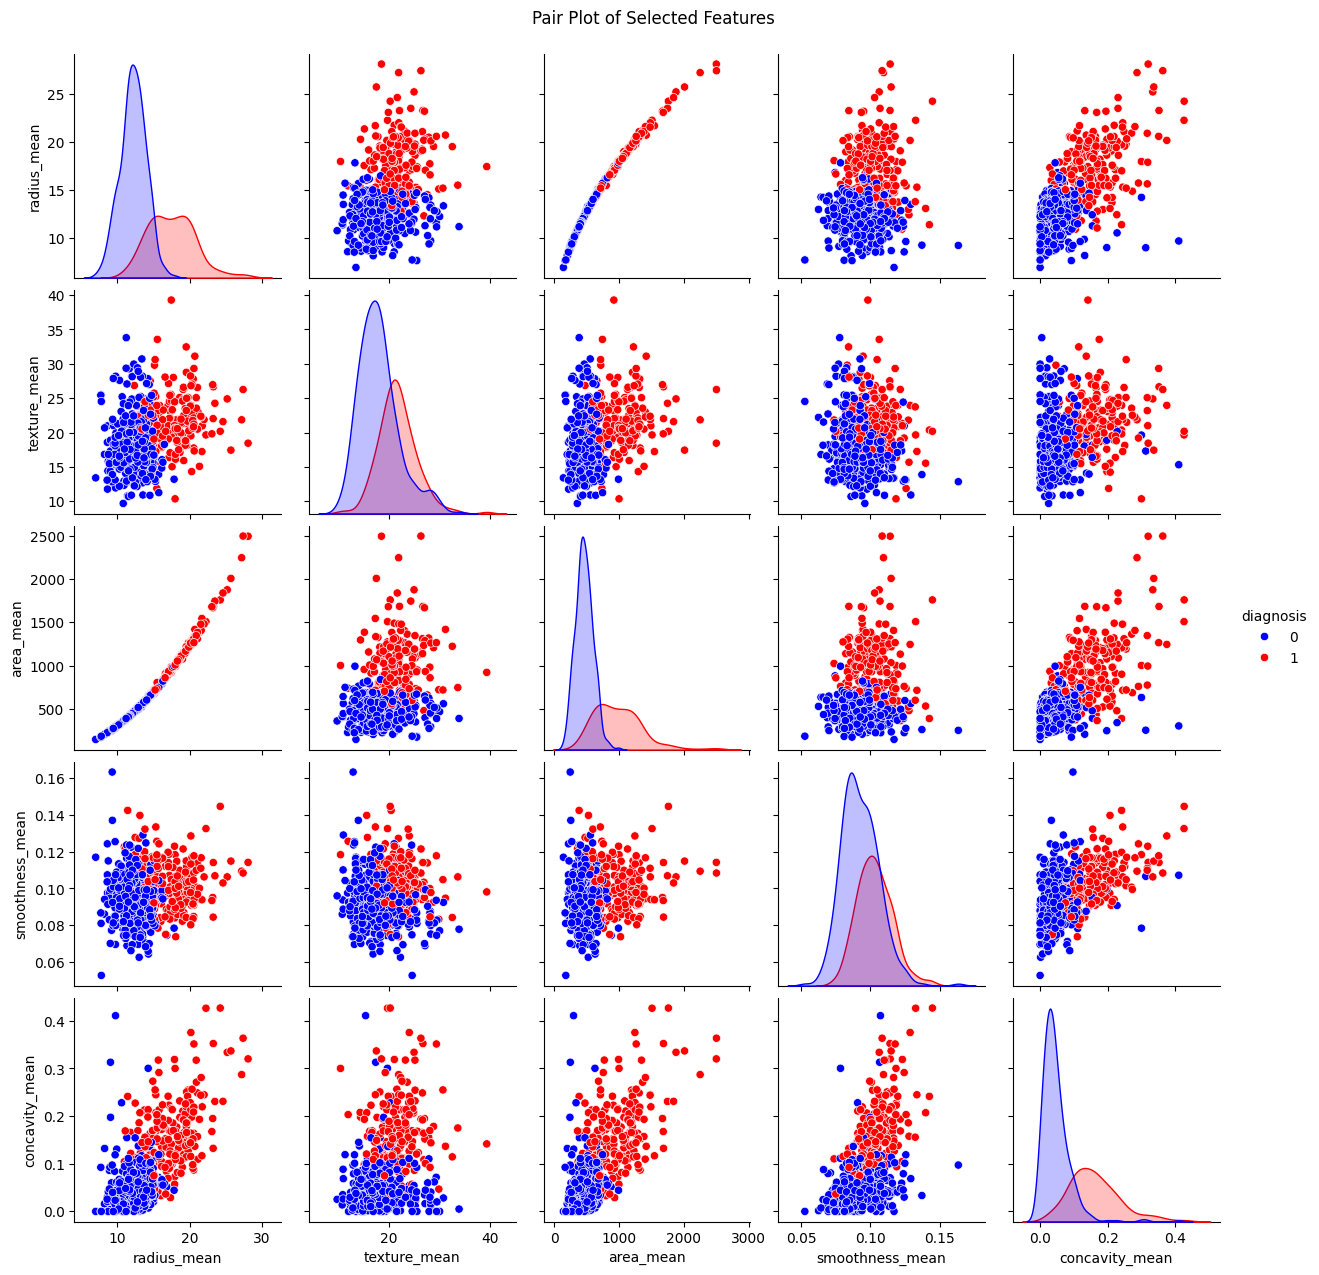

In [ ]:
# Map diagnosis column to numeric values if necessary
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Select features for pair plot
selected_features = ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'diagnosis']

# Create pair plot for selected features
sns.pairplot(df[selected_features], hue='diagnosis', palette={1: 'red', 0: 'blue'}, diag_kind='kde')
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()


<h1 style="color:pink;">5.Feature Engineering </h1>

### Principal Component Analysis (PCA)
Performing PCA to reduce the dimensionality of the dataset while retaining 10 principal components.

```python

In [ ]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import numpy as np

# Handle missing values by imputing the mean
imputer = SimpleImputer(strategy='mean')  # Use 'mean', 'median', or 'most_frequent' as needed
X_scaled_imputed = imputer.fit_transform(X_scaled)

# Apply PCA with 10 components
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled_imputed)

# Output the explained variance ratio and cumulative variance
print("Explained Variance Ratio by Principal Components:")
print(pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", pca.explained_variance_ratio_.cumsum())


Explained Variance Ratio by Principal Components:
[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]
Cumulative Explained Variance: [0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881]


### Feature Importance Analysis with RandomForestClassifier
This code uses the `RandomForestClassifier` to compute feature importance for the dataset `X` and `y`. The workflow includes:

1. **Training the Model**: The Random Forest model is initialized with 100 trees (`n_estimators=100`) and a fixed random seed (`random_state=42`).
2. **Computing Feature Importance**:
   - The importance of each feature is extracted using `rf.feature_importances_`.
   - Results are stored in a DataFrame, sorted by importance in descending order.
3. **Displaying the Top 10 Features**:
   - The top 10 most important features are printed for review.
4. **Extracting Top Features for Further Analysis**:
   - A subset `X_top_features` is created from the original DataFrame `df` containing only the top 10 features.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Extract feature importances
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)

# Print top 10 important features
print("\nTop 10 Important Features:")
print(feature_importances.head(10))

# Select top 10 features for further analysis
top_features = feature_importances['feature'].head(10).tolist()
X_top_features = df[top_features]


Top 10 Important Features:
                 feature  importance
22       perimeter_worst    0.155956
27  concave points_worst    0.148663
7    concave points_mean    0.107773
23            area_worst    0.105103
20          radius_worst    0.087399
3              area_mean    0.059511
6         concavity_mean    0.055535
13               area_se    0.043254
0            radius_mean    0.034205
2         perimeter_mean    0.024889


<h1 style="color:pink;">6.Data Splitting </h1>

### Preparing the Dataset for Model Training and Testing
This code refines the dataset for training and testing a classification model. Here’s a breakdown:

1. **Subset the Dataset**:
   - A new DataFrame, `df_top_features`, is created containing the previously identified top features (`top_features`) and the target column `diagnosis`.

2. **Separate Features and Target**:
   - Features (`X`) are obtained by dropping the target column `diagnosis`.
   - The target variable (`y`) is extracted as a separate Series.

3. **Train-Test Split**:
   - The dataset is split into training and testing sets using `train_test_split`:
     - `X_scaled`: The scaled feature dataset is used.
     - `y`: The target variable remains unchanged.
     - `test_size=0.2`: 20% of the data is reserved for testing.
     - `stratify=y`: Ensures the same proportion of classes in both training and test sets.
     - `random_state=42`: Sets a fixed random seed for reproducibility.

In [ ]:
#Create refined dataset with top features and implement train-test split
df_top_features = df[top_features + ['diagnosis']]
X = df_top_features.drop(columns=['diagnosis'])
y = df_top_features['diagnosis']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

<h1 style="color:pink;">7.Model Selection and Cross-Validation</h1>

### Model Comparison Using Cross-Validation
This code evaluates the performance of multiple machine learning models on the training dataset using cross-validation. The goal is to compare models' accuracy and variability to identify the most reliable performer.

#### Key Steps:
1. **Define Models**:
   - Four models are defined in a dictionary:
     - Logistic Regression (`LogisticRegression`)
     - Random Forest (`RandomForestClassifier`)
     - Support Vector Machine (`SVC`)
     - K-Nearest Neighbors (`KNeighborsClassifier`)

2. **Perform Cross-Validation**:
   - For each model, 5-fold cross-validation is applied to estimate the model's accuracy on unseen data.
   - The `cross_val_score` function computes accuracy scores for each fold.

3. **Print Results**:
   - The mean and standard deviation of cross-validation scores are calculated and displayed for each model.

In [ ]:
# Define models for comparison
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Evaluate model performance with cross-validation
print("Model Performance (Cross-Validation Accuracy):")
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{model_name}: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Model Performance (Cross-Validation Accuracy):
Logistic Regression: 0.9714 ± 0.0112
Random Forest: 0.9626 ± 0.0338
Support Vector Machine: 0.9736 ± 0.0149
K-Nearest Neighbors: 0.9626 ± 0.0226


<h1 style="color:pink;">8.Model Training</h1>

#### Key Steps:
1. **Define Hyperparameter Grids**:
   - Each model is associated with a dictionary of hyperparameters and their possible values:
     - **Logistic Regression**:
       - `C`: Regularization strength (values: 0.1, 1, 10)
       - `solver`: Optimization algorithm (`liblinear`, `lbfgs`)
     - **Random Forest**:
       - `n_estimators`: Number of trees (values: 50, 100, 200)
       - `max_depth`: Maximum tree depth (values: `None`, 10, 20)
       - `min_samples_split`: Minimum samples required to split a node (values: 2, 5, 10)
     - **Support Vector Machine**:
       - `C`: Regularization strength (values: 0.1, 1, 10)
       - `kernel`: Kernel type (`linear`, `rbf`)
     - **K-Nearest Neighbors**:
       - `n_neighbors`: Number of neighbors (values: 3, 5, 7, 9)
       - `weights`: Weight function for distance (`uniform`, `distance`)

2. **Purpose**:
   - These grids can be passed to search algorithms such as `GridSearchCV` or `RandomizedSearchCV` for hyperparameter tuning.

In [ ]:
# Define hyperparameter grids for model optimization
param_grids = {
    "Logistic Regression": {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "Support Vector Machine": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    }
}

### Train and Tune Each Model
This section of the code trains and tunes four different machine learning models (Logistic Regression, Random Forest, Support Vector Machine, and K-Nearest Neighbors) using `GridSearchCV` for hyperparameter optimization. It then selects and stores the best model for each algorithm based on the best hyperparameter configuration.

#### Key Steps:
1. **Model Selection**: 
   - Depending on the model name (`Logistic Regression`, `Random Forest`, `Support Vector Machine`, or `K-Nearest Neighbors`), the corresponding classifier is initialized.

2. **Hyperparameter Tuning with `GridSearchCV`**: 
   - For each model, `GridSearchCV` is used to perform cross-validation (with 5 folds) to evaluate the best combination of hyperparameters based on accuracy (`scoring='accuracy'`).

3. **Model Fitting and Best Estimator**:
   - Each model is trained on the `X_train` and `y_train` data, and the best-performing model (with optimal hyperparameters) is stored in the `best_models` dictionary.

4. **Printing the Best Parameters**:
   - After tuning, the best hyperparameters found for each model are printed out for inspection.

In [ ]:
# Train and tune models using GridSearchCV to find the best parameters
best_models = {}
for model_name, params in param_grids.items():
    if model_name == "Logistic Regression":
        model = LogisticRegression(max_iter=1000)
    elif model_name == "Random Forest":
        model = RandomForestClassifier(random_state=42)
    elif model_name == "Support Vector Machine":
        model = SVC(probability=True)
    elif model_name == "K-Nearest Neighbors":
        model = KNeighborsClassifier()

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Store the best model
    best_models[model_name] = grid_search.best_estimator_

    # Print the best hyperparameters
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best parameters for Support Vector Machine: {'C': 1, 'kernel': 'rbf'}
Best parameters for K-Nearest Neighbors: {'n_neighbors': 3, 'weights': 'uniform'}


<h1 style="color:pink;">9.Model Evaluation</h1>

### Model Evaluation Metrics on Test Set

In this section, we evaluate the performance of each model from `best_models` on the test set (`X_test`, `y_test`). For each model, we calculate several important metrics, including:

1. **Accuracy**: Measures how often the classifier correctly predicts the target label.
2. **Precision**: The ratio of true positive predictions to the total predicted positives.
3. **Recall**: The ratio of true positive predictions to the actual positives.
4. **F1 Score**: The harmonic mean of precision and recall, providing a balance between the two.
5. **AUC-ROC**: Area Under the Receiver Operating Characteristic Curve, showing the model's ability to distinguish between classes.

#### Key Steps:
1. **Prediction and Probability Calculation**:
   - For each model, predictions (`y_pred`) are generated using the `predict()` method.
   - For models that support probability estimation (`predict_proba()`), the probabilities for class 1 are used to calculate the AUC-ROC.

2. **Metric Calculation**:
   - For each model, accuracy, precision, recall, F1 score, and AUC-ROC (if applicable) are calculated and displayed.

3. **Confusion Matrix**:
   - A confusion matrix is displayed for each model, showing the number of true positives, false positives, true negatives, and false negatives.

4. **ROC Curve**:
   - If the model supports probability predictions, an ROC curve is plotted with the AUC score.


Model Evaluation Metrics on Test Set:

Logistic Regression:
  Accuracy: 0.9825
  Precision: 1.0000
  Recall: 0.9524
  F1 Score: 0.9756
  AUC-ROC: 0.9980


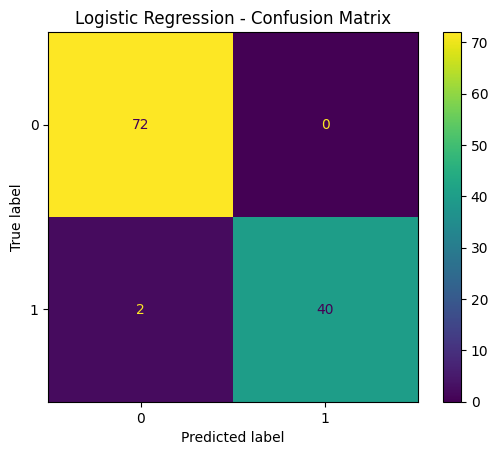


Random Forest:
  Accuracy: 0.9737
  Precision: 1.0000
  Recall: 0.9286
  F1 Score: 0.9630
  AUC-ROC: 0.9940


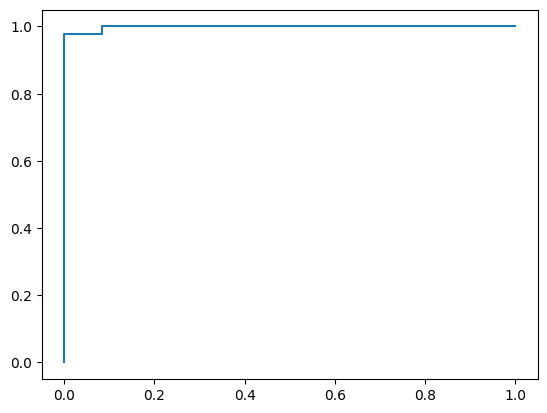

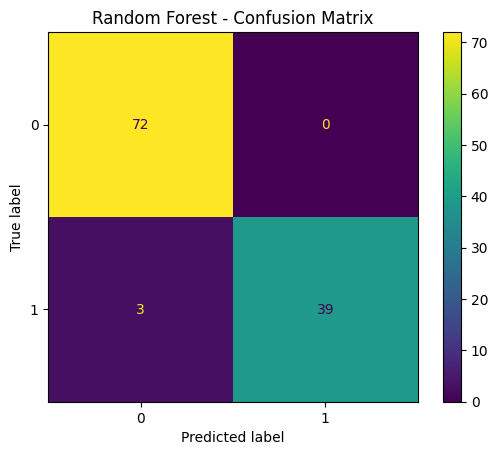


Support Vector Machine:
  Accuracy: 0.9737
  Precision: 1.0000
  Recall: 0.9286
  F1 Score: 0.9630
  AUC-ROC: 0.9954


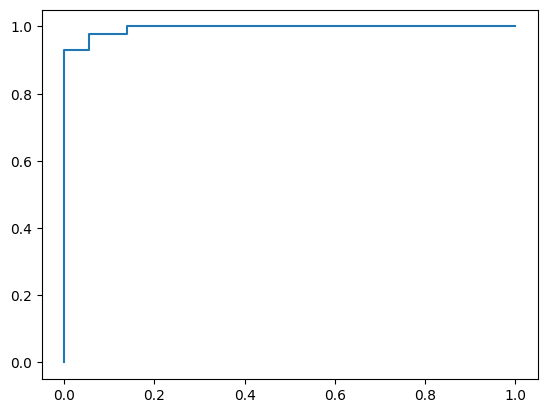

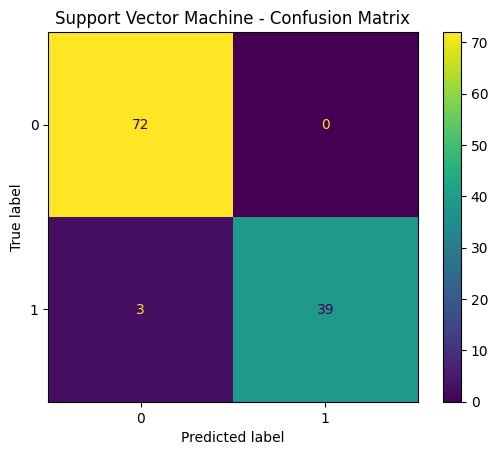


K-Nearest Neighbors:
  Accuracy: 0.9386
  Precision: 0.9730
  Recall: 0.8571
  F1 Score: 0.9114
  AUC-ROC: 0.9825


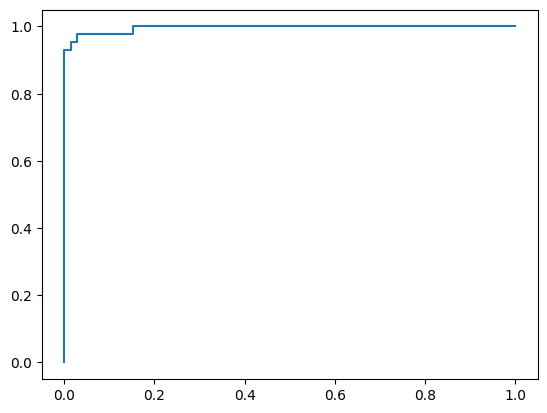

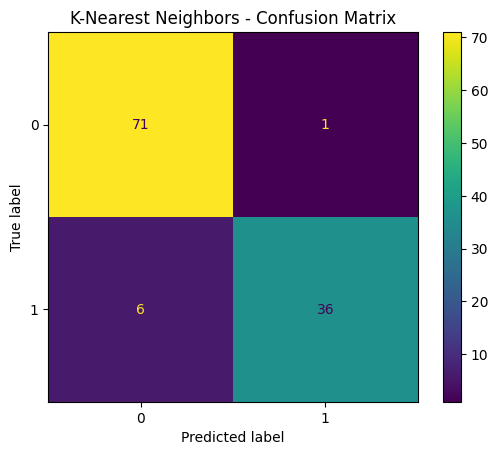

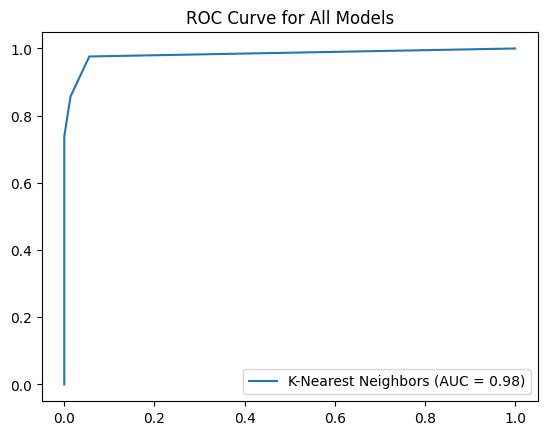

In [ ]:
from sklearn.metrics import roc_curve, auc

print("\nModel Evaluation Metrics on Test Set:")
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)

    # Check if the model has predict_proba method
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    accuracy = accuracy_score(y_test, y_pred)
    
    # Specify pos_label='M' (assuming 'M' is the positive class, adjust as needed)
    precision = precision_score(y_test, y_pred, pos_label='M')
    recall = recall_score(y_test, y_pred, pos_label='M')
    f1 = f1_score(y_test, y_pred, pos_label='M')
    
    auc_value = roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"

    print(f"\n{model_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  AUC-ROC: {auc_value:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

    # Only plot the ROC curve if probabilities are available
    if y_prob is not None:
        fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='M')  # Specify positive class as 'M'
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.legend(loc='lower right')
plt.title("ROC Curve for All Models")
plt.show()
